## **Simple Black-box Adversarial Attack (SimBA) and Binary Input Detector Using MNIST-10**

This notebook demonstrates the implementation of the SimBA attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered in this notebook are:

* Load the Required Libraries
* Load the Dataset and Inspect the Data
* Create a Deep Learning Model
* Train and Evaluate the Deep Learning Model on MNIST Test Data
* Implement SimBA Attack Using ART
* Create Adversarial Samples Using the SimBA Attack
* Evaluate the Deep Learning Model Against the Adversarial Samples
* Create a Detector Model to Detect Adversarial Samples
* Train and Evaluate the Detector Model

### **Simple Black-box Adversarial Attack (SimBA) - Overview**

The **Simple Black-box Adversarial Attack (SimBA)** is a method developed by **Song et al**. in 2020, designed for creating adversarial examples in a black-box setting. **Black-box** attacks refer to situations where the attacker does not have access to the model’s internal parameters (such as its architecture or weights) and can only query the model’s output for a given input.

SimBA is one of the **simple yet effective** methods for black-box adversarial attacks. It aims to find adversarial examples by using **gradient estimation** methods to perturb the input in a way that maximizes the model's misclassification, without needing to know the model's gradients.

The main idea behind SimBA is to perform **gradient-free optimization** using a **query-based approach**, which makes it suitable for scenarios where access to model internals (like gradients) is restricted.

#### **Key Concepts:**

**1. Black-box Attack:** The attacker can only observe the model's output for a given input, without knowledge of the internal architecture or parameters of the model.

**2. Query-based Attack:** The attack is based on making queries to the model and observing the output (such as class probabilities or logits).

**3. Gradient-free Optimization:** Unlike attacks like FGSM or PGD, SimBA does not require computing gradients directly. Instead, it estimates the gradient using **model queries** to determine which direction to perturb the input in.

**4. Perturbation Strategy:** SimBA uses a local search method that perturbs the input in small steps and evaluates which perturbation maximizes the misclassification.

#### **Steps in the SimBA Attack**

SimBA uses a simple but effective approach to perturb the input by querying the model's output at different perturbed points and selecting the direction that maximizes the likelihood of misclassification.

Here are the detailed steps involved in executing a SimBA attack:

**1. Initialization:**

* Start with an original input $x$ (such as an image) and its true label $y$.
* Define a small perturbation budget $ϵ$, which controls how much the input can be perturbed.
* Choose a specific perturbation step size (for example, $α$ which determines how much we perturb each input during each query).

**2. Perturbation Process:**

SimBA generates adversarial examples by perturbing the input in the following manner:

* For each query, SimBA perturbs the input in each dimension (pixel, for image inputs).

* At each iteration, SimBA perturbs the input by a small amount in one of two directions: positive or negative for each pixel.

* Mathematically, let the original input be $x$, and suppose the perturbation applied at iteration $t$ is represented as $δ_{t}$​. The perturbed inputs for each dimension (pixel) are created as:
$$x_{t}^{+}=x+α⋅sign(∇_{xi}) \quad and \quad x_{t}^{−}=x−α⋅sign(∇_{xi})$$

* where $α$ is the step size, $x_{t}^{+}$ is the perturbed input with positive perturbation in the $i^{th}$ dimension, and $x_{t}^{−}$​ is the perturbed input with negative perturbation in the $i^{th}$ dimension.

**3. Query and Evaluate:**

For each perturbed input:

* Query the model with $x_{t}^{+}​$ and $x_{t}^{−}$​ to get the corresponding outputs. These outputs could be probabilities or logits (depending on the model’s output type).
* For classification models, SimBA queries both perturbed versions and selects the direction (positive or negative perturbation) that increases the probability of misclassification. The goal is to perturb the input in a way that increases the distance between the true class $y$ and the predicted class.

**4. Selecting Perturbation Direction:**

* For each perturbed direction (positive or negative), evaluate the model’s output (such as the predicted class probability). Select the perturbation direction that leads to the most significant change in the model’s output, which typically corresponds to an increase in the misclassification confidence.

**5. Iterative Process:**

* Repeat the above process for multiple dimensions (pixels) of the input.
* Continue iterating the process to gradually build the adversarial perturbation that causes the model to misclassify the input. The attack typically continues until the adversarial example is successfully found or until a query budget (maximum allowed queries) is exhausted.

**6. Final Adversarial Example:**

* Once the attack is successful (i.e., the model misclassifies the perturbed input), the generated adversarial example $x_{adv}$​ is returned.

Formula Breakdown

SimBA does not explicitly use a loss function or gradient computation like gradient-based attacks (e.g., FGSM or PGD). Instead, it operates as follows:

**1. Perturbation**: For each query, perturb the input in both directions for each pixel:
$$x_{t}^{+}=x+α⋅sign(∇_{xi}) \quad and \quad x_{t}^{−}=x−α⋅sign(∇_{xi})$$
    

**2. Querying the Model**: Evaluate the model’s output for each perturbed input:

$$\hat{y}^{+}=Model(x_{t}^{+}) \quad and \quad \hat{y}^{−}=Model(x_{t}^{−})$$

Select Direction: Choose the perturbation direction based on which leads to greater misclassification:

$$ \delta_i = \begin{cases} +\alpha & \text{if } \hat{y}^{+} \text{ leads to a greater misclassification} \\ -\alpha & \text{if } \hat{y}^{-} \text{ leads to a greater misclassification} \end{cases} $$

Repeat for Multiple Steps: Iterate this process until the perturbation causes the model to misclassify or until the allowed query budget is exhausted.

#### **How SimBA Works During the Attack**

**1. Input**: Start with the original input $x$ and its true label $y$.

**2. Perturbation**: Perturb the input across multiple pixels, making small adjustments in both directions (positive and negative).

**3. Query**: Query the model with both perturbed inputs and evaluate which perturbation moves the output further away from the true class, increasing the misclassification.

**4. Iterate**: Repeat the perturbation process, fine-tuning the perturbation until a successful adversarial example is found or the query limit is reached.

**5. Final Adversarial Example**: The result is an adversarial example $x_{adv}$​ that causes the model to misclassify the input, generated entirely from the query responses without requiring access to the model’s internal structure or gradients.

#### **Strengths and Weaknesses of SimBA**

**Strengths:**

* **Black-box Applicability**: SimBA is designed specifically for black-box attacks, making it useful when the attacker has no access to the model's parameters or gradients.
* **Simplicity**: The method is relatively simple to implement and does not require sophisticated optimization techniques or complex loss functions.
* **Efficiency**: SimBA is computationally efficient, especially in situations where querying the model is relatively inexpensive, as it avoids complex optimization or gradient computation.

**Weaknesses:**

* **Query Budget Limitation**: Since SimBA is a query-based attack, the number of queries to the model is a critical factor. If the query budget is limited, the attack may not succeed, especially for high-dimensional inputs (like images).
* **Effectiveness**: While SimBA is effective in many cases, its performance may not be as strong as gradient-based methods in some scenarios, especially if the model is robust to certain types of perturbations.
* **Dimensionality Issues**: In cases where the input data is high-dimensional (e.g., images with many pixels), SimBA might need a large number of queries to perturb a sufficient number of pixels to cause misclassification.

## Install and load required libraries 

In [1]:
# Install prerequired libraries.
# !pip install adversarial-robustness-toolbox

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import SimBA
from art.defences.detector.evasion import BinaryInputDetector

ImportError: libcudnn.so.9: cannot open shared object file: No such file or directory

In [2]:
# Specifying the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

3 Physical GPUs, 1 Logical GPU


2025-01-22 18:31:20.792544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-22 18:31:21.138135: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 32 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:d5:00.0, compute capability: 8.6


### Load MNIST dataset

In [10]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = np.load('./../Datasets/mnist10_dataset.npy', allow_pickle = True)
x_train, x_test = x_train / 255.0, x_test / 255.0
min = x_train.min()
max = x_train.max()

x_train.shape, y_train.shape, x_test.shape, y_test.shape, min, max

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), 0.0, 1.0)

#### Inspect the Data


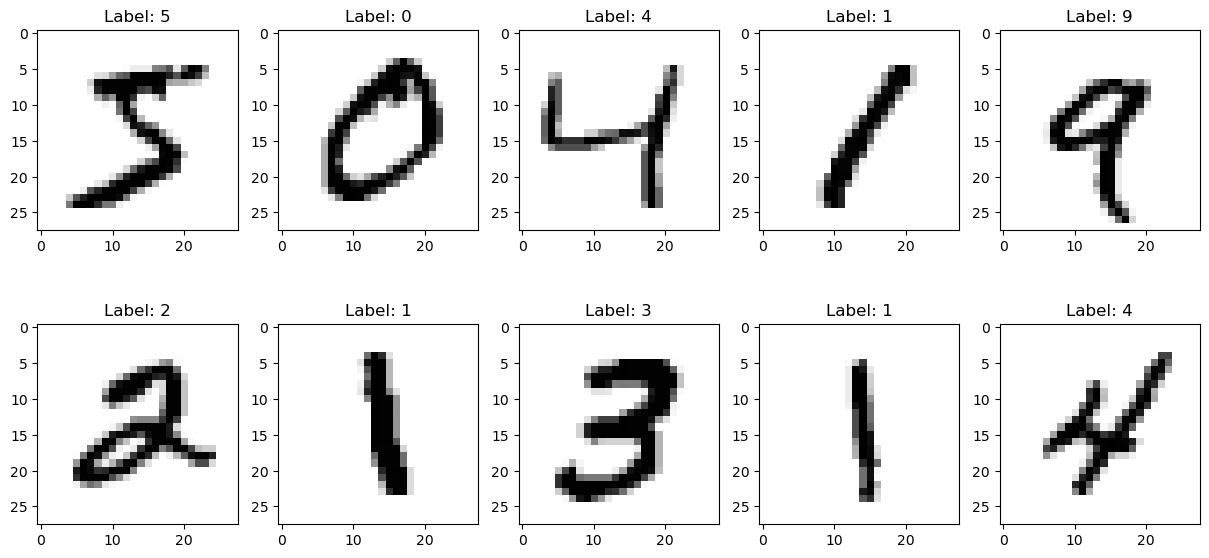

In [11]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
  im_idx = np.argwhere(y_train == i)[0]
  ax[i].imshow(image, cmap = 'gray_r')
  ax[i].set_title(f"Label: {label}",  fontsize=12)

In [12]:
nb_classes =10
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)
x_test = np.expand_dims(x_test, axis=-1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)
x_train = np.expand_dims(x_train, axis=-1)

## **Training Model**

#### **Model Description**

This convolutional neural network (CNN) is designed for image classification tasks. It consists of several layers that progressively extract features from the input images and classify them into one of 10 categories.

1. Input Layer: The model accepts input images of shape (28, 28, 1).
2. Convolutional Layers:
    * First Conv Layer: 32 filters of size (3x3), activated by ReLU, followed by max pooling (2x2). 
    * Second Conv Layer: 64 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Third Conv Layer: 128 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
3. Flatten Layer: Converts the 2D feature maps to a 1D feature vector.
4. Dense Layer: Fully connected layer with 128 neurons, activated by ReLU, and includes a dropout of 20% to prevent overfitting.
5. Output Layer: 10 neurons with softmax activation to classify the input image into one of the 10 categories.

The model is compiled with the Adam optimizer and uses categorical cross-entropy loss, with accuracy as the performance metric.

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']);
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

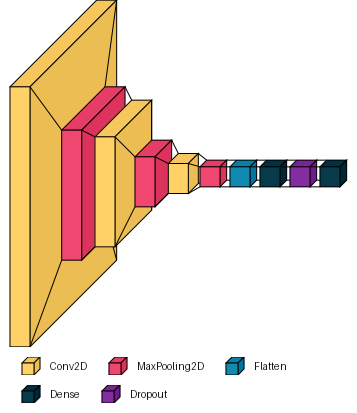

In [14]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

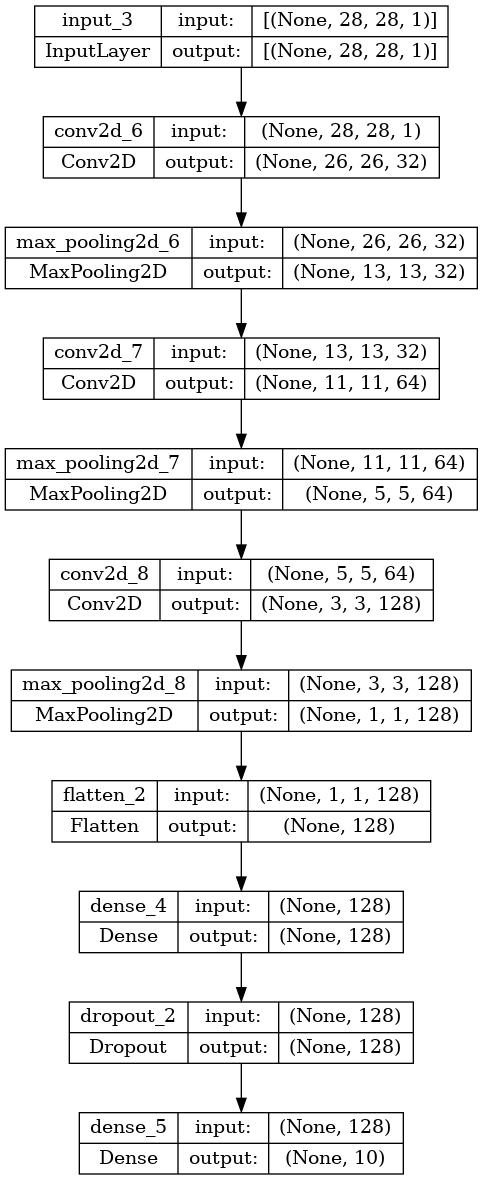

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Fit the model on training data.

In [16]:
# history = model.fit(x_train, y_train, epochs = 3)
model = tf.keras.models.load_model('./../Models/mnist10_conv.keras')

2025-01-14 12:52:27.418935: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 173 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:17:00.0, compute capability: 7.5
2025-01-14 12:52:27.536863: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2025-01-14 12:52:27.635696: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_4/kernel/Assign' id:516 op device:{requested: '', assigned: ''} def:{{{node dense_4/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_4/kernel, dense_4/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-14 12:52:28.242947: W tensorflow/c/c_api.cc:291

#### Evaluate model accuracy on test data.

In [17]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

2025-01-14 12:52:31.184444: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_3/mul' id:924 op device:{requested: '', assigned: ''} def:{{{node loss_3/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_3/mul/x, loss_3/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-14 12:52:31.355962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902


Accuracy on test data: 98.57%


In [18]:
x_test = x_test[0:500]
y_test = y_test[0:500]

#### Create an ART Keras classifier.

In [19]:
classifier = KerasClassifier(model=model, clip_values=(0, 1))

## **SimBA Attack**

class art.attacks.evasion.SimBA(classifier: CLASSIFIER_TYPE, attack: str = 'dct', max_iter: int = 3000, order: str = 'random', epsilon: float = 0.1, freq_dim: int = 4, stride: int = 1, targeted: bool = False, batch_size: int = 1, verbose: bool = True)

---

This class implements the black-box attack SimBA.
* Paper link: https://arxiv.org/abs/1905.07121

*__init__(classifier: CLASSIFIER_TYPE, attack: str = 'dct', max_iter: int = 3000, order: str = 'random', epsilon: float = 0.1, freq_dim: int = 4, stride: int = 1, targeted: bool = False, batch_size: int = 1, verbose: bool = True)*

**Create a SimBA (dct) attack instance.**

    Parameters
* classifier – A trained classifier predicting probabilities and not logits.
* attack (str) – attack type: pixel (px) or DCT (dct) attacks
* max_iter (int) – The maximum number of iterations.
* epsilon (float) – Overshoot parameter.
* order (str) – order of pixel attacks: random or diagonal (diag)
* freq_dim (int) – dimensionality of 2D frequency space (DCT).
* stride (int) – stride for block order (DCT).
* targeted (bool) – perform targeted attack
* batch_size (int) – Batch size (but, batch process unavailable in this implementation)
* verbose (bool) – Show progress bars.


    diagonal_order(image_size, channels)
Defines a diagonal order for pixel attacks. order is fixed across diagonals but are randomized across channels and within the diagonal e.g. [1, 2, 5] [3, 4, 8] [6, 7, 9]

    Parameters
* image_size – image size (i.e., width or height)
* channels – the number of channels

    
    Return order
* An array holding the diagonal order of pixel attacks.

    
    generate(x: ndarray, y: Optional[ndarray] = None, **kwargs) → ndarray
Generate adversarial samples and return them in an array.

    Return type
* ndarray
    
    
    Parameters
* x (ndarray) – An array with the original inputs to be attacked.
* y – An array with the true or target labels.

    
    Returns
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#simple-black-box-adversarial-attack

### Create an ART SimBA attack.

In [20]:
attack = SimBA(classifier = classifier,
              attack = 'dct',
              max_iter = 1000,
              order = 'random',
               epsilon = 0.1,
               freq_dim = 4,
               stride = 1,
               targeted = False,
               batch_size = 1,
                verbose = False)

#### Generate adversarial test data.

In [25]:
# x_test_adv = attack.generate(x_test, y=y_test)
# np.savez('./SimBA_data/SimBA_generated_mnist_data.npz', x_test_adv=x_test_adv, y_test=y_test )
test_adv_data = np.load('./SimBA_data/SimBA_generated_mnist_data.npz')
x_test_adv, y_test = test_adv_data['x_test_adv'], test_adv_data['y_test']

#### Visualise the first adversarial test sample.

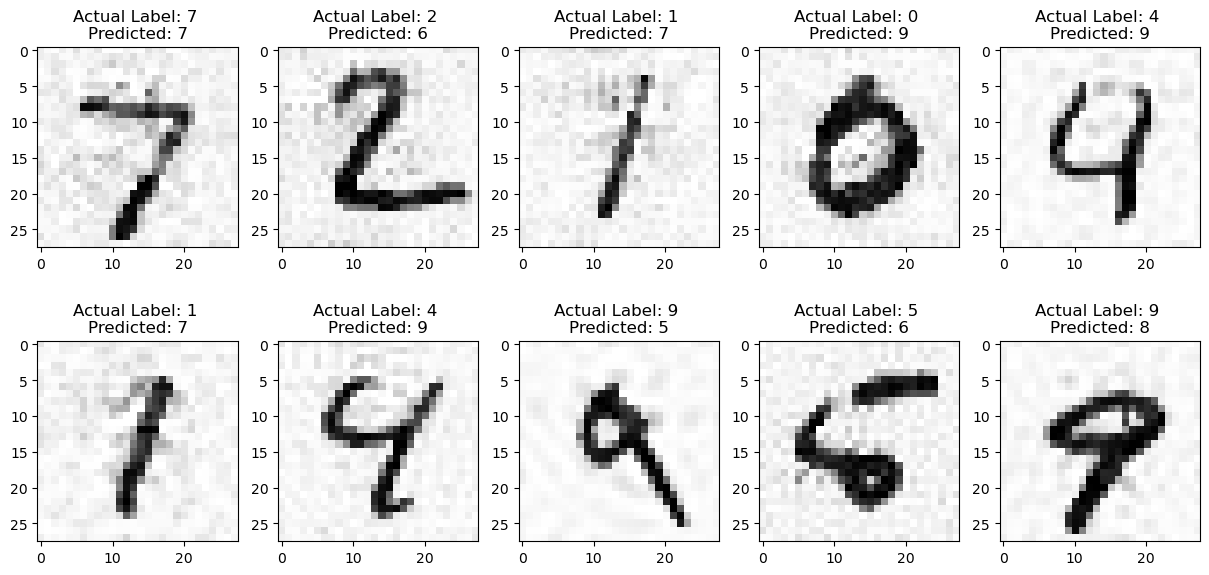

In [30]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
  ax[i].imshow(image, cmap="gray_r")
  ax[i].set_title(f"Actual Label: {label.argmax()} \nPredicted: {model.predict(np.expand_dims(image, axis=0)).argmax()}",  fontsize=12)


#### Evaluate the trained model

In [31]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

Accuracy on adversarial test data: 8.60%
Average perturbation: 0.05


### Training the Detector

We create the second model using Keras API with the same strucure of the classifier. Here we use the Keras Sequential model and add a sequence of layers. Afterwards the model is compiles with optimizer, loss function and metrics. This model will be used to classify between ordinary samples and perturbated ones

In [32]:
detector_model = tf.keras.models.Sequential([
    # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

detector_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy']);

In [33]:
# Generating adversarail training data is time taking process. 
# So, we have decreased the number of samples to 500 to save time, 
# if you do not want to generate yourself, we have the saved data for your in the next chunk of cells. 
x_train_adv = attack.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)
y_train_detector = np.concatenate((np.array([[1,0]]*nb_train), np.array([[0,1]]*nb_train)), axis=0)

2025-01-14 14:00:16.958702: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_7/bias/Assign' id:1374 op device:{requested: '', assigned: ''} def:{{{node dense_7/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_7/bias, dense_7/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [35]:
# Load the data that is already trained. 
# np.savez('./SimBA_data/SimBA_detector_mnist_data.npz', x_train_detector=x_train_detector, y_train_detector=y_train_detector )
detector_data = np.load('./SimBA_data/SimBA_detector_mnist_data.npz')
x_train_detector, y_train_detector= detector_data['x_train_detector'], detector_data['y_train_detector']
x_train_detector.shape, y_train_detector.shape

((1000, 28, 28, 1), (1000, 2))

In [37]:
detector_model.fit(x_train_detector, y_train_detector, epochs=3)

Train on 1000 samples
Epoch 1/3
1000/1000 [==============================] - 1s 624us/sample - loss: 0.1841 - accuracy: 0.9300
Epoch 2/3
1000/1000 [==============================] - 1s 576us/sample - loss: 0.1833 - accuracy: 0.9430
Epoch 3/3
1000/1000 [==============================] - 1s 653us/sample - loss: 0.1568 - accuracy: 0.9460


Evaluate the adversarial generated data

In [38]:
x_test = x_test[:500]
nb_test = x_test.shape[0]

x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)
y_test_detector = np.concatenate((np.array([[1,0]]*nb_test), np.array([[0,1]]*nb_test)), axis=0)

In [39]:
x_test_detector.shape, y_test_detector.shape

((1000, 28, 28, 1), (1000, 2))

In [40]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

2025-01-14 15:16:36.641373: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_4/mul' id:1456 op device:{requested: '', assigned: ''} def:{{{node loss_4/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_4/mul/x, loss_4/dense_7_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Accuracy on test data: 95.70%


In [41]:
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)
detector = BinaryInputDetector(detector_classifier)

In [42]:
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

### Evaluating the detector

Apply the detector to the adversarial test data:

In [43]:
_, is_adversarial = detector.detect(x_test_adv)
flag_adv = np.sum(is_adversarial)

print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

2025-01-14 15:16:43.913911: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_7/Softmax' id:1380 op device:{requested: '', assigned: ''} def:{{{node dense_7/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_7/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Adversarial test data (first 100 images):
Flagged: 473
Not flagged: 27


2025-01-14 15:16:44.159586: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 152.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Apply the detector to the first 100 original test images:

In [45]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 500 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(500 - flag_original))

Original test data (first 500 images):
Flagged: 28
Not flagged: 472


Evaluate the detector for different attack strengths learning_rate (Note: for the training of detector, learning_rate=0.01 was used)

In [46]:
epsilon_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
nb_flag_adv = []
nb_missclass = []


attack.set_params(**{'max_iter' : 10})

for rate in epsilon_range:
    attack.set_params(**{'epsilon': rate})
    x_test_adv = attack.generate(x_test[:100])
    nb_flag_adv += [np.sum(detector.detect(x_test_adv)[1])]
    nb_missclass += [np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))]

eps_range = [0] + epsilon_range
nb_flag_adv = [flag_original] + nb_flag_adv
nb_missclass = [2] + nb_missclass

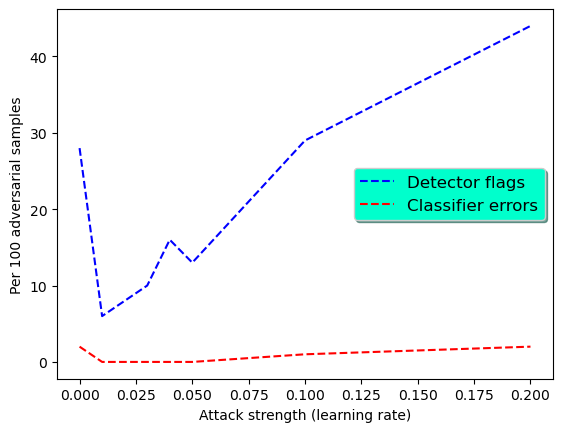

In [47]:
fig, ax = plt.subplots()
ax.plot(np.array(eps_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(eps_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

## **Summary**


#### Simple Black-box Adversarial Attack (SimBA) and Binary Input Detector Using MNIST-10

This notebook demonstrates the implementation of the SimBA attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered include:

1. **Load the Required Libraries:** Import necessary Python libraries and modules, including TensorFlow/Keras and ART.
2. **Load the Dataset and Inspect the Data:** Load and visualize the MNIST-10 dataset of handwritten digits (0-9).
3. **Create a Deep Learning Model:** Construct a CNN to classify MNIST-10 digits, including convolutional, pooling, and fully connected layers.
4. **Train and Evaluate the Model:** Train the CNN on MNIST-10 and evaluate its baseline accuracy on test data.
5. **Implement SimBA Attack Using ART:** Use ART to perform the SimBA attack, which perturbs images by flipping pixel signs based on model queries. SimBA is notable for its simplicity and effectiveness in black-box settings.
6. **Create Adversarial Samples Using SimBA:** Generate adversarial examples from the test images using SimBA and visually inspect them.
7. **Evaluate Against Adversarial Samples:** Test the model's robustness by evaluating its accuracy on the adversarial samples.
8. **Create a Detector Model:** Develop a binary classifier to detect adversarial inputs by differentiating between original and adversarial images.
9. **Train and Evaluate the Detector:** Train the detector using a labeled dataset of original and adversarial samples, and evaluate its accuracy in identifying adversarial attacks.

This summary highlights the process and key tasks involved in implementing the SimBA attack and developing a binary input detector using the MNIST-10 dataset, illustrating the importance of adversarial defenses in machine learning.